<h2> Classification of Clothes Items using Decision Tree Algorithm </h2>

<h3> Importing Dataset </h3>

In [160]:
#import data
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from matplotlib import pyplot as plt 

data = pd.read_csv('list_attr_img - anno_fine.csv',sep=';')

In [155]:
data.head(20000)

,Images,Floral,Graphic,Striped,Embroidered,Pleated,Solid,Lattice,Long Sleeved,Short Sleeved,...,Denim,Chiffon,Cotton,Leather,Faux,Knit,Tight,Loose,Conventional,Final labels
0,img_highres_subset/Striped_Denim_Shorts-img_00...,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Bottom
1,img_highres_subset/Rose_Print_Shorts-img_00000...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Bottom
2,img_highres_subset/Embroidered_High-Neck_Blous...,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,Top
3,img_highres_subset/Tie-Dye_Cami_Romper-img_000...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Whole
4,img_highres_subset/Favorite_Scoop_Neck_Tank-im...,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,img_highres_subset/Varsity-Striped_Baseball_Te...,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Top
19996,img_highres_subset/Abstract_Brushstroke_Pocket...,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,Top
19997,img_highres_subset/Abstract_Brushstroke_Pocket...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Top
19998,img_highres_subset/2-in-1_Space_Dye_Athletic_T...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,Top


<h3> Getting Main Training Data </h3>

In [38]:
data_train=data[0:16000]
data_train.head(16000)

,Images,Floral,Graphic,Striped,Embroidered,Pleated,Solid,Lattice,Long Sleeved,Short Sleeved,...,Denim,Chiffon,Cotton,Leather,Faux,Knit,Tight,Loose,Conventional,Final labels
0,img_highres_subset/Striped_Denim_Shorts-img_00...,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Bottom
1,img_highres_subset/Rose_Print_Shorts-img_00000...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Bottom
2,img_highres_subset/Embroidered_High-Neck_Blous...,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,Top
3,img_highres_subset/Tie-Dye_Cami_Romper-img_000...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Whole
4,img_highres_subset/Favorite_Scoop_Neck_Tank-im...,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,img_highres_subset/Abstract_Tribal_Print_Tank-...,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Top
15996,img_highres_subset/Belted_Crop_Top-img_0000002...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,Top
15997,img_highres_subset/Button-Front_Mini_Skirt-img...,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,Bottom
15998,img_highres_subset/Floral_Print_Shirt_Dress-im...,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,Whole


<h3> Getting Main Testing Data </h3>

In [39]:
data_test=data[16000:20000]
data_test.head(4000)

,Images,Floral,Graphic,Striped,Embroidered,Pleated,Solid,Lattice,Long Sleeved,Short Sleeved,...,Denim,Chiffon,Cotton,Leather,Faux,Knit,Tight,Loose,Conventional,Final labels
16000,img_highres_subset/Rose_Print_Maxi_Dress-img_0...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,Whole
16001,img_highres_subset/Abstract_Print_Kimono-img_0...,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,Whole
16002,img_highres_subset/Hooded_Woven_Jacket-img_000...,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,Top
16003,img_highres_subset/Cami_Crop_Top-img_00000043.jpg,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Top
16004,img_highres_subset/Asymmetrical_Open-Front_Bla...,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,img_highres_subset/Varsity-Striped_Baseball_Te...,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Top
19996,img_highres_subset/Abstract_Brushstroke_Pocket...,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,Top
19997,img_highres_subset/Abstract_Brushstroke_Pocket...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Top
19998,img_highres_subset/2-in-1_Space_Dye_Athletic_T...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,Top


In [158]:
sec_train=data_train[0:12800]
sec_train.head(12800)

,Images,Floral,Graphic,Striped,Embroidered,Pleated,Solid,Lattice,Long Sleeved,Short Sleeved,...,Denim,Chiffon,Cotton,Leather,Faux,Knit,Tight,Loose,Conventional,Final labels
0,img_highres_subset/Striped_Denim_Shorts-img_00...,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Bottom
1,img_highres_subset/Rose_Print_Shorts-img_00000...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Bottom
2,img_highres_subset/Embroidered_High-Neck_Blous...,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,Top
3,img_highres_subset/Tie-Dye_Cami_Romper-img_000...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Whole
4,img_highres_subset/Favorite_Scoop_Neck_Tank-im...,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,img_highres_subset/Reversed_French_Terry_Sweat...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,Bottom
12796,img_highres_subset/Must-Have_Maxi_Dress-img_00...,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,Whole
12797,img_highres_subset/Crew_Neck_Knit_Tee-img_0000...,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,Top
12798,img_highres_subset/Linen_Crew_Neck_Tee-img_000...,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,Top


In [159]:
sec_test=data_train[12800:16000]
sec_test.head(3200)

,Images,Floral,Graphic,Striped,Embroidered,Pleated,Solid,Lattice,Long Sleeved,Short Sleeved,...,Denim,Chiffon,Cotton,Leather,Faux,Knit,Tight,Loose,Conventional,Final labels
12800,img_highres_subset/Ruched-Sleeve_Blazer-img_00...,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,Top
12801,img_highres_subset/Be_Cool_Crop_Top-img_000000...,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,Top
12802,img_highres_subset/Racerback_Mini_Dress-img_00...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,Whole
12803,img_highres_subset/Floral_Flutter_Sleeve_Dress...,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,Whole
12804,img_highres_subset/Tulip-Hem_Bodycon_Dress-img...,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,Whole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,img_highres_subset/Abstract_Tribal_Print_Tank-...,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Top
15996,img_highres_subset/Belted_Crop_Top-img_0000002...,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,Top
15997,img_highres_subset/Button-Front_Mini_Skirt-img...,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,Bottom
15998,img_highres_subset/Floral_Print_Shirt_Dress-im...,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,Whole


<h3> Splitting Feature and Class Labels in Training Steps </h3>

In [161]:
x = data_train.drop(['Images'],axis=1) #dropping 'Images'
x = x.drop(['Final labels'],axis=1) #feature
y = data_train['Final labels'] #label

<h3> Secondary Split </h3>
Training  = 80%
Testing = 20 %

In [162]:
#split training dan testing data
#building machine learning model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#features = X
#target = y

features_train, features_test, target_train, target_test = train_test_split(x,y,test_size = 0.2,random_state = 54)
model = DecisionTreeClassifier()
model.fit(features_train, target_train) #--> 0.8 model

DecisionTreeClassifier()

<h3> Evaluation of Matching Target Label and Predicted Label </h3>

In [163]:
#evaluation of model accuracy
from sklearn.metrics import accuracy_score
train_pred = model.predict(features_train)
test_pred = model.predict(features_test) #--> 0.2 test
accuracy_train = accuracy_score(target_train, train_pred)
accuracy_pred = accuracy_score(target_test, test_pred) #--> target test: Actual label of test data 0.2, #pred: prediction label 

pred=pd.DataFrame({'Actual':target_test, 'Predicted':test_pred})
print(pred)

print("Train Accuracy", accuracy_train)
print("Test Accuracy", accuracy_pred)

       Actual Predicted
1317      Top       Top
6080    Whole     Whole
3095    Whole     Whole
10664   Whole     Whole
6891      Top       Top
...       ...       ...
1908    Whole     Whole
7168      Top       Top
2878   Bottom    Bottom
15541   Whole     Whole
13065     Top       Top

[3200 rows x 2 columns]
Train Accuracy 0.88328125
Test Accuracy 0.886875


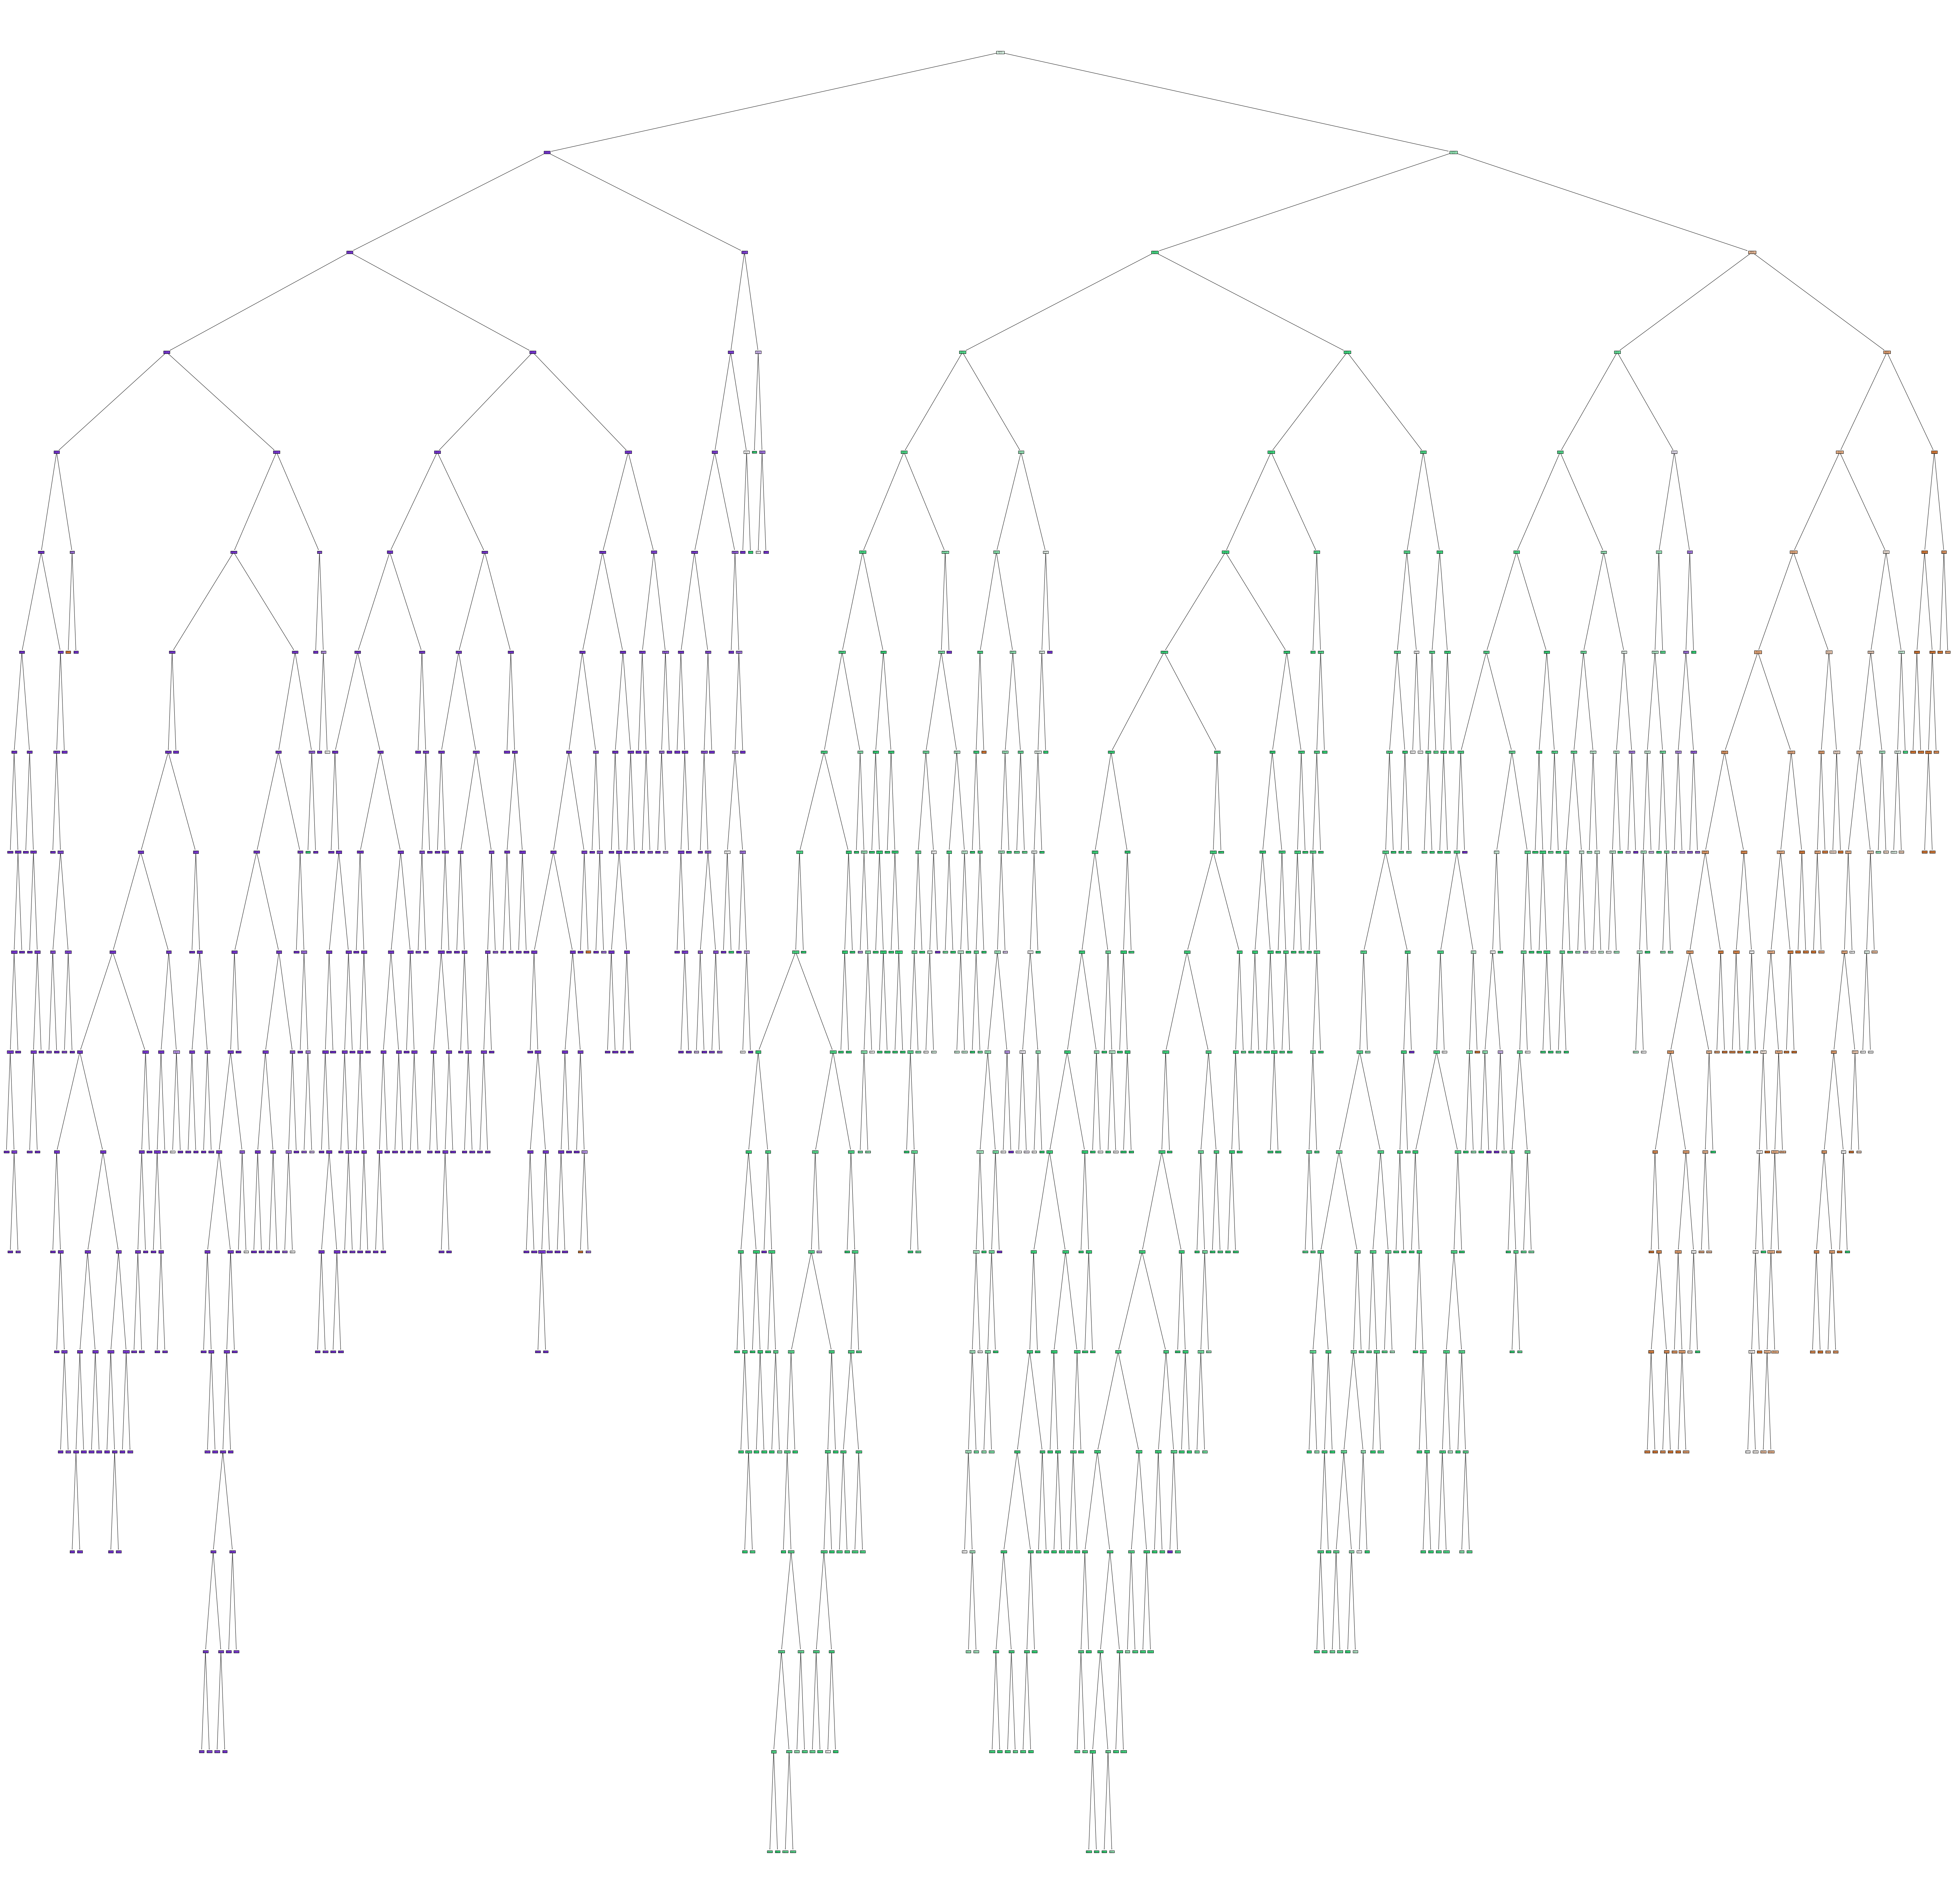

In [164]:
model = model.fit(x, y)

from sklearn import tree

fig = plt.figure(figsize=(100,100))

class_names=np.unique(data_train['Final labels'].values)
class_values=[]

for i in class_names:
    class_values=np.append(class_values,i)
    
_ = tree.plot_tree(model, 
                   feature_names = x.columns.values,
                   class_names=class_values,
                   filled=True)

fig.savefig('tree1.png')

<h3> Confusion Matrix </h3>


In [167]:
cm_test=confusion_matrix(target_test, test_pred,labels=["Bottom", "Top", "Whole"])
print("Trial Confusion Matrix:\n", cm_test)  #--> 16,000*0.2=3,200


Trial Confusion Matrix:
 [[ 577   16    2]
 [ 146 1292   24]
 [  61  113  969]]


<h3> Classification Performance Report </h3>

In [168]:
print("Trial Classification Performance Report:")
cr_test = print(classification_report(target_test,test_pred))


Trial Classification Performance Report:
              precision    recall  f1-score   support

      Bottom       0.74      0.97      0.84       595
         Top       0.91      0.88      0.90      1462
       Whole       0.97      0.85      0.91      1143

    accuracy                           0.89      3200
   macro avg       0.87      0.90      0.88      3200
weighted avg       0.90      0.89      0.89      3200



<h3> Manual Parameter Tuning </h3>

<b> A.1. Tuning Decision Tree using </b> `max_depth` <br/>
The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

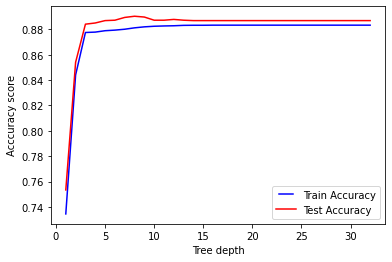

,Tree Depth,Train Accuracy,Test Accuracy
7,8.0,0.881172,0.890312
8,9.0,0.881953,0.889687
6,7.0,0.880078,0.889375
11,12.0,0.882812,0.887813
10,11.0,0.882656,0.887188
5,6.0,0.879375,0.887188
9,10.0,0.882422,0.887188
12,13.0,0.883125,0.887188
26,27.0,0.883281,0.886875
22,23.0,0.883281,0.886875


In [169]:
max_depths = np.linspace(1, 32, 32, endpoint=True) #--> di 31&32 accuracy menurun
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(features_train, target_train)
    train_pred = dt.predict(features_train)
    accuracy = accuracy_score(target_train, train_pred)
    train_results.append(accuracy)
    
    test_pred = dt.predict(features_test)
    accuracy = accuracy_score(target_test, test_pred)
    test_results.append(accuracy)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Acccuracy score')
plt.xlabel('Tree depth')
plt.show()

max_depth_table = pd.DataFrame({'Tree Depth':max_depths,'Train Accuracy':train_results,'Test Accuracy':test_results})
max_depth_table.sort_values(by='Test Accuracy',inplace=True,ascending=False)
max_depth_table


<b> A.2. Tuning Decision Tree using </b> `min_sample_split` <br/>
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples


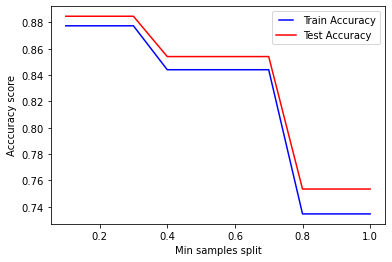

,Min samples split,Train Accuracy,Test Accuracy
0,0.1,0.877422,0.884687
1,0.2,0.877422,0.884687
2,0.3,0.877422,0.884687
3,0.4,0.844063,0.854062
4,0.5,0.844063,0.854062
5,0.6,0.844063,0.854062
6,0.7,0.844063,0.854062
7,0.8,0.734531,0.753437
8,0.9,0.734531,0.753437
9,1.0,0.734531,0.753437


In [170]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(features_train, target_train)
    train_pred = dt.predict(features_train)
    accuracy = accuracy_score(target_train, train_pred)
    train_results.append(accuracy)
    
    test_pred = dt.predict(features_test)
    accuracy = accuracy_score(target_test, test_pred)
    test_results.append(accuracy)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Acccuracy score')
plt.xlabel('Min samples split')
plt.show()

min_samples_splits_table = pd.DataFrame({'Min samples split':min_samples_splits,'Train Accuracy':train_results,'Test Accuracy':test_results})
min_samples_splits_table.sort_values(by='Test Accuracy',inplace=True,ascending=False)
min_samples_splits_table


<b> A.3. Tuning Decision Tree using </b> `min_samples_leaf` <br/>
min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.


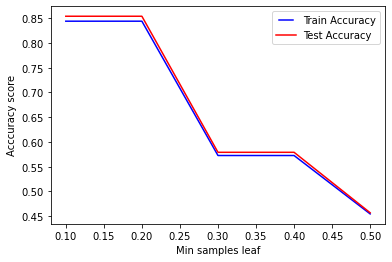

,Min samples leaf,Train Accuracy,Test Accuracy
0,0.1,0.844063,0.854062
1,0.2,0.844063,0.854062
2,0.3,0.572578,0.579063
3,0.4,0.572578,0.579063
4,0.5,0.454531,0.456875


In [171]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True) #--> hanya bisa 0.1-0.5
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(features_train, target_train)
    train_pred = dt.predict(features_train)
    accuracy = accuracy_score(target_train, train_pred)
    train_results.append(accuracy)
    
    test_pred = dt.predict(features_test)
    accuracy = accuracy_score(target_test, test_pred)
    test_results.append(accuracy)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Acccuracy score')
plt.xlabel('Min samples leaf')
plt.show()

min_samples_leaf_table = pd.DataFrame({'Min samples leaf':min_samples_leafs,'Train Accuracy':train_results,'Test Accuracy':test_results})
min_samples_leaf_table.sort_values(by='Test Accuracy',inplace=True,ascending=False)
min_samples_leaf_table


<b> A.4. Tuning Decision Tree using </b> `max_features` <br/>
max_features represents the number of features to consider when looking for the best split.


In [172]:
features_train.shape[1] #--> amt of features to tune

26

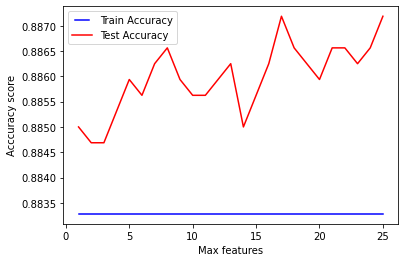

,Max features,Train Accuracy,Test Accuracy
24,25,0.883281,0.887188
16,17,0.883281,0.887188
23,24,0.883281,0.886563
21,22,0.883281,0.886563
20,21,0.883281,0.886563
7,8,0.883281,0.886563
17,18,0.883281,0.886563
15,16,0.883281,0.886250
22,23,0.883281,0.886250
18,19,0.883281,0.886250


In [173]:
max_features = list(range(1,features_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(features_train, target_train)
    train_pred = dt.predict(features_train)
    accuracy = accuracy_score(target_train, train_pred)
    train_results.append(accuracy)
    
    test_pred = dt.predict(features_test)
    accuracy = accuracy_score(target_test, test_pred)
    test_results.append(accuracy)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_features, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Acccuracy score')
plt.xlabel('Max features')
plt.show()

max_features_table = pd.DataFrame({'Max features':max_features,'Train Accuracy':train_results,'Test Accuracy':test_results})
max_features_table.sort_values(by='Test Accuracy',inplace=True,ascending=False)
max_features_table

<h3> RESULT of Percentage Split </h3>
Max Depth 8; 88.12/89.03 | Min Samples Split 0.1, 0.2, 0.3; 87.74/88.47 | Min Samples Leaf 0.1, 0.2; 84.41/85.41 | Max Features keeps Changing; 88.33/88.72

<h3> Automatic Parameter Tuning using `GridSearchCV` </h3>

In [196]:
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(features_train,target_train,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['entropy'],'max_depth': np.arange(1, 32), 'min_samples_split': np.arange(0.1,1),'min_samples_leaf': np.arange(0.1,0.5),'max_features': np.arange(1,26)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(features_train,target_train)
    return dtree_gscv.best_params_

print("Best Parameter according to GridSearchCV:")
dtree_grid_search(features_train,target_train,10)

Best Parameter according to GridSearchCV:


{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 17,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

<h3>Final Model </h3>
'max_depth=?, min_samples_split=?, min_samples_leaf=?, max_features=?'

In [210]:
features_train, features_test, target_train, target_test = train_test_split(x,y,test_size = 0.2)
final_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.1, min_samples_leaf=0.1, max_features=17)
#final_model=DecisionTreeClassifier() --> 88.68%/87.06%
final_model.fit(features_train, target_train) #--> model 0.8 
train_pred = final_model.predict(features_train)
test_pred = final_model.predict(features_test) #--> 0.2 test data
accuracy_train = accuracy_score(target_train, train_pred)
accuracy_pred = accuracy_score(target_test, test_pred) #--> target test: label actual dr test data 0.2, #pred: prediction label 

#print(target_test) #label actual
#print(pred) # prediction label

print("Train Accuracy", accuracy_train)
print("Test Accuracy", accuracy_pred)



Train Accuracy 0.878515625
Test Accuracy 0.8803125


<h3> Final Testing Sample </h3>

In [178]:
#Uji (Testing)

x_final_test = data_test.drop(['Images'],axis=1) #drop kolom 'Images'
x_final_test = x_final_test.drop(['Final labels'],axis=1) #fitur
y_final_test = data_test['Final labels'] #label

y_final_test_predicted = final_model.predict(x_final_test)

accuracy_final_test = accuracy_score(y_final_test, y_final_test_predicted) 
accuracy_final_test

0.87575

<h3> Print Text Representation </h3>

In [179]:
text_representation = tree.export_text(final_model)
print(text_representation)

|--- feature_12 <= 0.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_16 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: Whole
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- class: Whole
|   |   |--- feature_16 >  0.50
|   |   |   |--- feature_18 <= 0.50
|   |   |   |   |--- class: Whole
|   |   |   |--- feature_18 >  0.50
|   |   |   |   |--- class: Whole
|   |--- feature_7 >  0.50
|   |   |--- class: Whole
|--- feature_12 >  0.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_13 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |--- class: Top
|   |   |   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |   |   |--- class: Top
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: Top
|   |   |   |   |--- feature_22 >  0.50
|   |   |   |   |   |--- class: Top
|   |   | 

In [180]:
with open("decision_tree-rule.log", "w") as fout:
    fout.write(text_representation)

<h3> Plot Tree with plot_tree </h3>

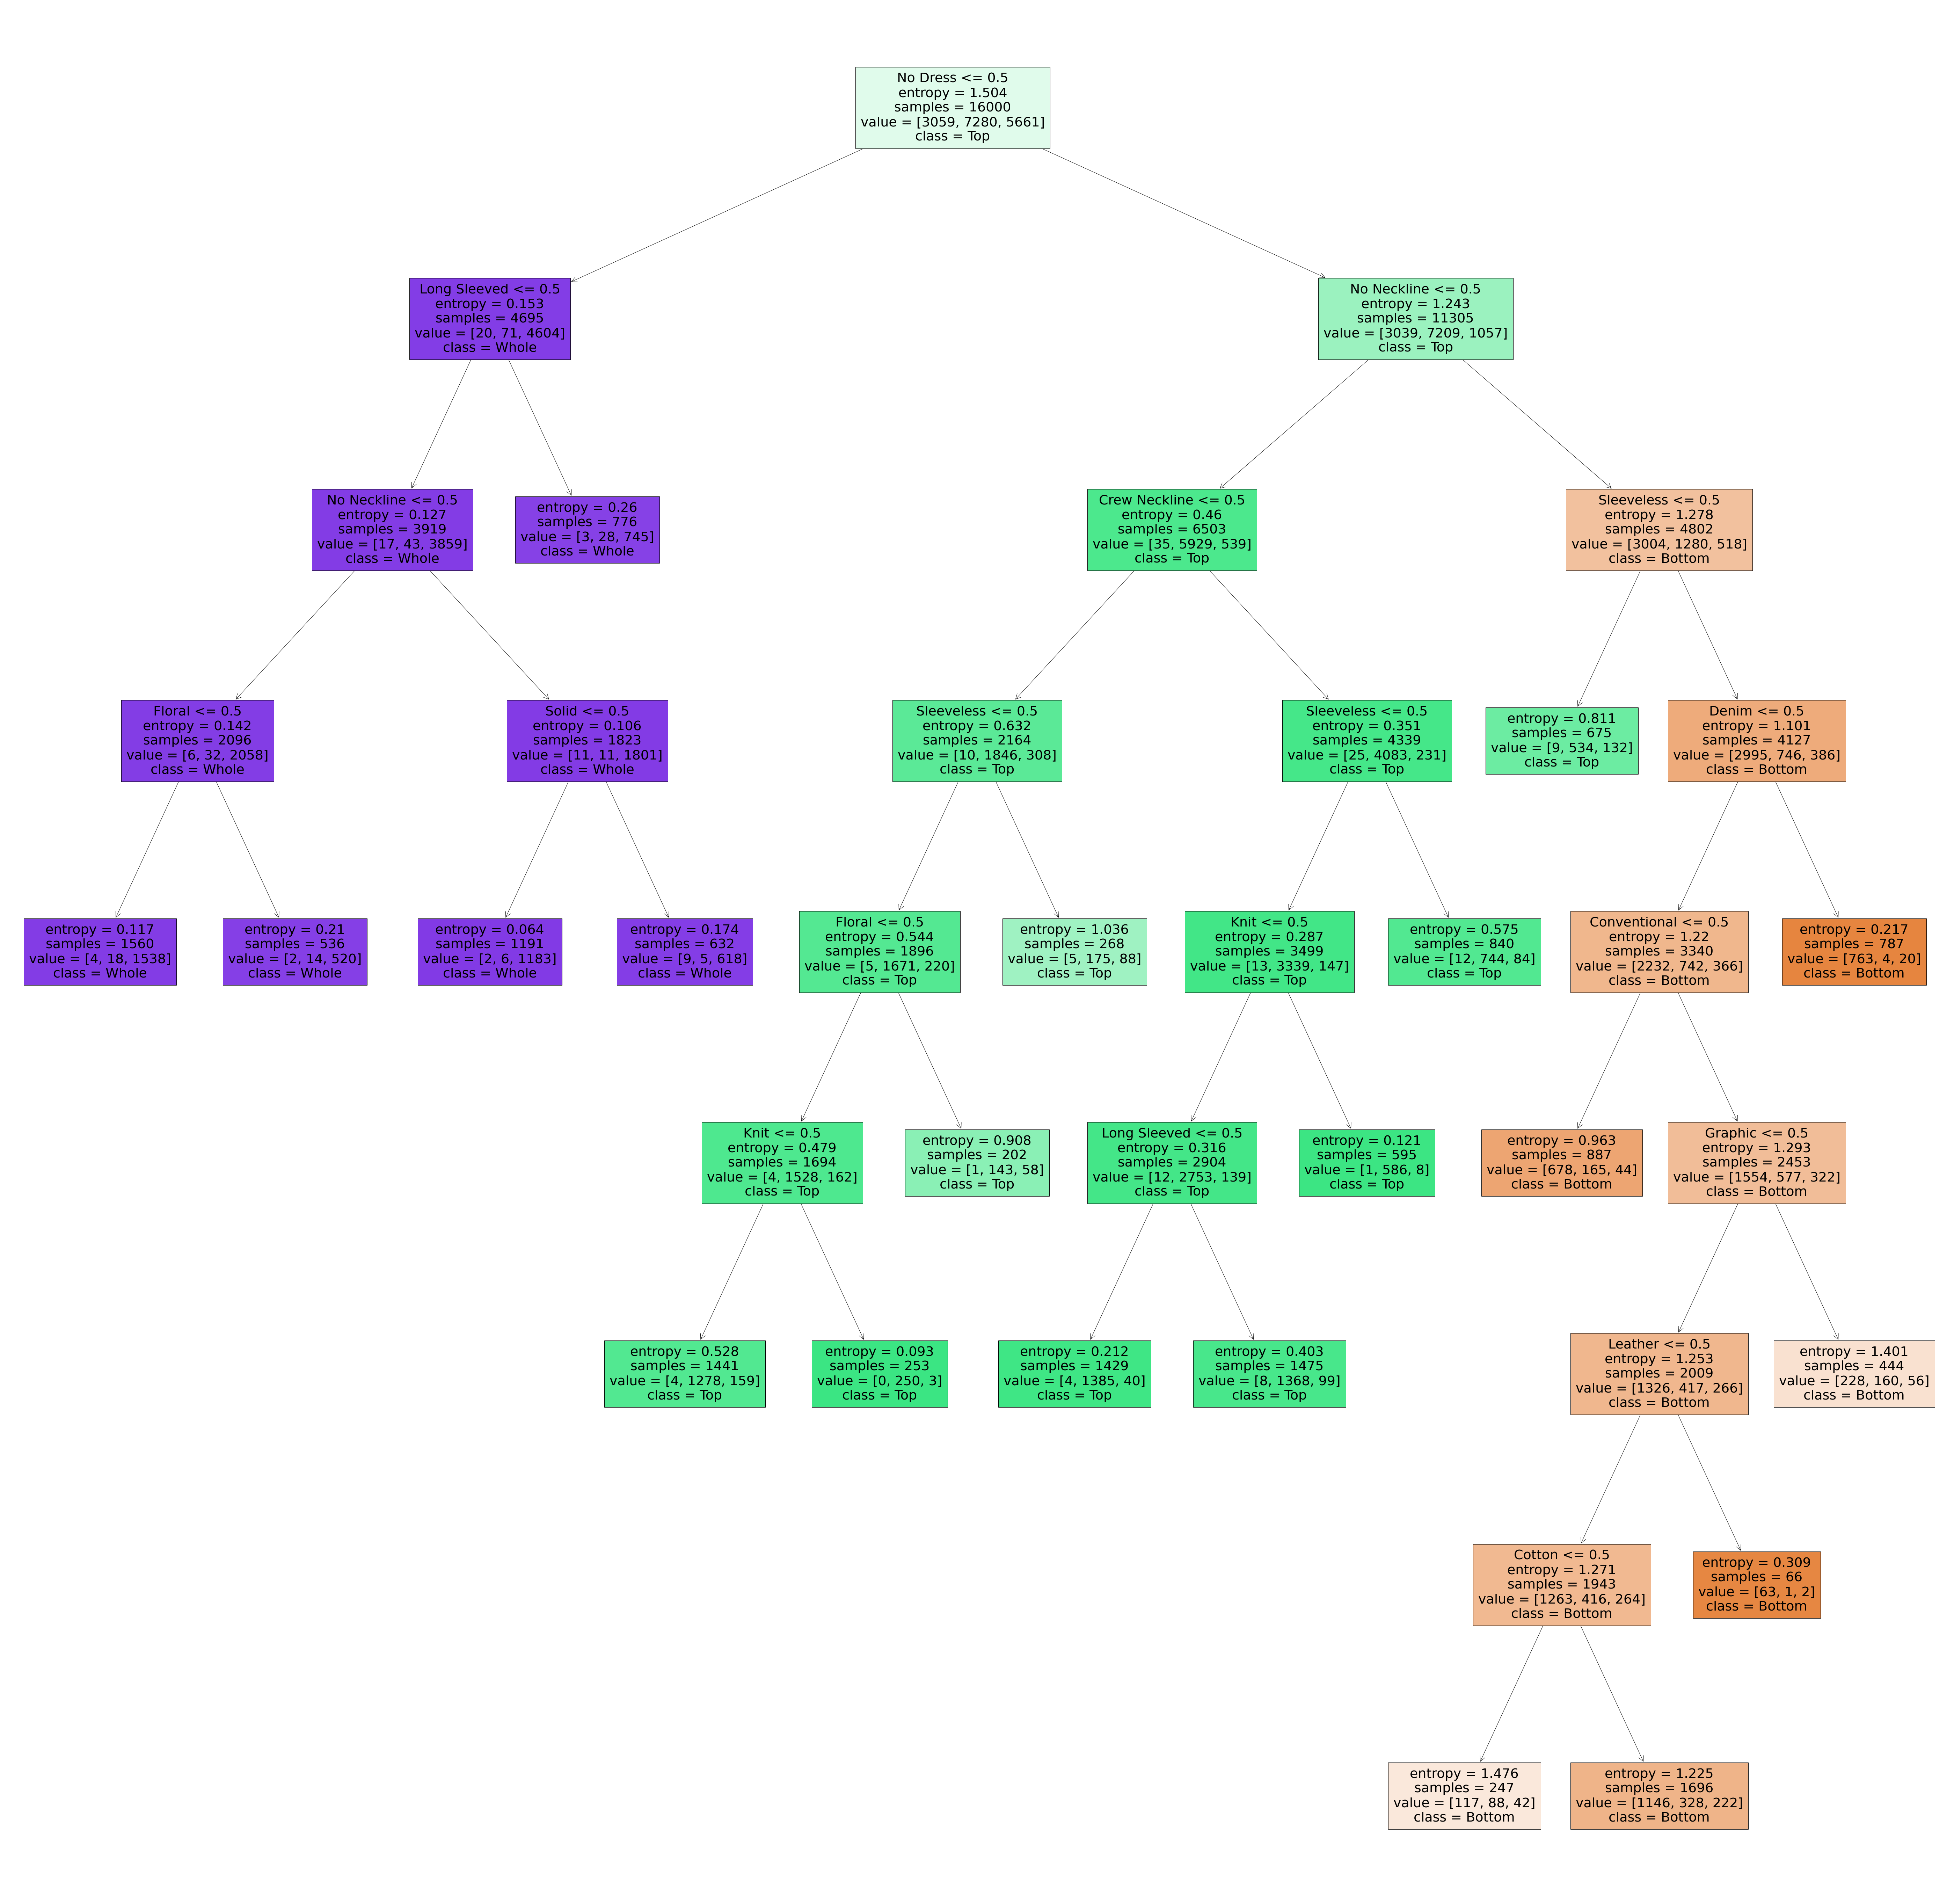

In [182]:
final_model = final_model.fit(x, y)

from sklearn import tree

fig = plt.figure(figsize=(100,100))

class_names=np.unique(data_train['Final labels'].values)
class_values=[]

for i in class_names:
    class_values=np.append(class_values,i)
    
_ = tree.plot_tree(final_model, 
                   feature_names = x.columns.values,
                   class_names=class_values,
                   filled=True)

fig.savefig('tree.png')

<h3> Final Model Performance Report </h3>

In [183]:
from sklearn.metrics import classification_report, confusion_matrix
print("Test Confusion Matrix:\n",confusion_matrix(y_final_test, y_final_test_predicted)) #--> 4,000

Test Confusion Matrix:
 [[ 736   11    7]
 [ 197 1624   18]
 [ 106  158 1143]]


In [184]:
print(classification_report(y_final_test, y_final_test_predicted))

              precision    recall  f1-score   support

      Bottom       0.71      0.98      0.82       754
         Top       0.91      0.88      0.89      1839
       Whole       0.98      0.81      0.89      1407

    accuracy                           0.88      4000
   macro avg       0.86      0.89      0.87      4000
weighted avg       0.89      0.88      0.88      4000



<h3> Feature Importance </h3>

In [188]:
importances = pd.DataFrame({'feature':features_train.columns,'importance':np.round(final_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [189]:
print(importances)

            feature  importance
12         No Dress       0.580
16      No Neckline       0.308
9        Sleeveless       0.071
17            Denim       0.019
13    Crew Neckline       0.006
22             Knit       0.003
0            Floral       0.003
25     Conventional       0.003
1           Graphic       0.002
20          Leather       0.002
19           Cotton       0.002
7      Long Sleeved       0.002
5             Solid       0.000
11      Mini Length       0.000
14       V Neckline       0.000
15  Square Neckline       0.000
8     Short Sleeved       0.000
3       Embroidered       0.000
18          Chiffon       0.000
10      Maxi Length       0.000
6           Lattice       0.000
21             Faux       0.000
2           Striped       0.000
23            Tight       0.000
24            Loose       0.000
4           Pleated       0.000
